In [65]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.ndimage import convolve
from sklearn import linear_model, datasets, metrics, cross_validation
from sklearn.cross_validation import train_test_split
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from __future__ import print_function
%matplotlib inline

In [51]:
def nudge_dataset(X, Y):
    """
    This produces a dataset 5 times bigger than the original one,
    by moving the 8x8 images in X around by 1px to left, right, down, up
    """
    direction_vectors = [
        [[0, 1, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [1, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 1],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 1, 0]]]

    shift = lambda x, w: convolve(x.reshape((64, 64)), mode='constant', weights=w).ravel()
    X = np.concatenate([X] +  [np.apply_along_axis(shift, 1, X, vector) for vector in direction_vectors])
    Y = np.concatenate([Y for _ in range(5)], axis=0)
    return X, Y

In [52]:
olivetti = datasets.fetch_olivetti_faces()

In [66]:
print(olivetti.images[0].shape)
print (olivetti.data.shape)

(64, 64)
(400, 4096)


In [39]:
olivetti.images[0]

array([[ 0.30991736,  0.36776859,  0.41735536, ...,  0.37190083,
         0.33057851,  0.30578512],
       [ 0.3429752 ,  0.40495867,  0.43801653, ...,  0.37190083,
         0.33884299,  0.3140496 ],
       [ 0.3429752 ,  0.41735536,  0.45041323, ...,  0.38016528,
         0.33884299,  0.29752067],
       ..., 
       [ 0.21487603,  0.20661157,  0.22314049, ...,  0.15289256,
         0.16528925,  0.17355372],
       [ 0.20247933,  0.2107438 ,  0.2107438 , ...,  0.14876033,
         0.16115703,  0.16528925],
       [ 0.20247933,  0.20661157,  0.20247933, ...,  0.15289256,
         0.16115703,  0.1570248 ]], dtype=float32)

In [28]:
plt.gray() #doctest: +SKIP

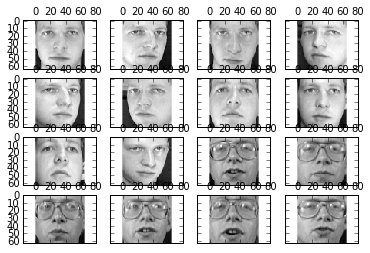

In [29]:
f, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12), (ax13, ax14, ax15, ax16)) = plt.subplots(4, 4, sharex='col', sharey='row')
for t,x in zip([ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15,ax16], range(16)):
    t.matshow(olivetti.images[x])

In [45]:
X = np.asarray(olivetti.data, 'float32')

X = (X - np.min(X, 0)) / (np.max(X, 0) + 0.0001)
X, Y = nudge_dataset(X, olivetti.target)
X= X > 0.5

In [59]:
logistic = linear_model.LogisticRegression(C=10)
rbm = BernoulliRBM(n_components=180, learning_rate=0.01, batch_size=10, n_iter=50, verbose=True, random_state=None)
clf = Pipeline(steps=[('rbm', rbm), ('clf', logistic)])
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split( X, Y, test_size=0.2, random_state=0)
clf.fit(X_train,Y_train) 
Y_pred = clf.predict(X_test)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -2128.17, time = 18.62s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -2212.80, time = 26.78s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -2010.68, time = 26.75s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -1940.59, time = 26.74s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -1930.13, time = 26.73s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -1814.29, time = 26.74s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -1832.83, time = 26.74s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -1836.92, time = 26.76s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -1779.18, time = 26.76s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -1566.90, time = 26.73s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -1617.37, time = 27.19s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -1763.52, time = 27.86s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -1519.45, time = 26.60s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -1501.88, t

In [67]:
print ('Score:  ', (metrics.classification_report(Y_test, Y_pred)))

Score:                precision    recall  f1-score   support

          0       1.00      1.00      1.00        12
          1       1.00      1.00      1.00        12
          2       1.00      1.00      1.00         9
          3       1.00      1.00      1.00        14
          4       1.00      1.00      1.00        10
          5       0.92      1.00      0.96        12
          6       1.00      0.89      0.94         9
          7       0.91      1.00      0.95        10
          8       1.00      1.00      1.00         9
          9       1.00      0.91      0.95        11
         10       1.00      1.00      1.00         9
         11       1.00      1.00      1.00        12
         12       1.00      1.00      1.00         8
         13       1.00      1.00      1.00        11
         14       1.00      1.00      1.00        12
         15       1.00      1.00      1.00        12
         16       1.00      1.00      1.00        10
         17       1.00      1.00    

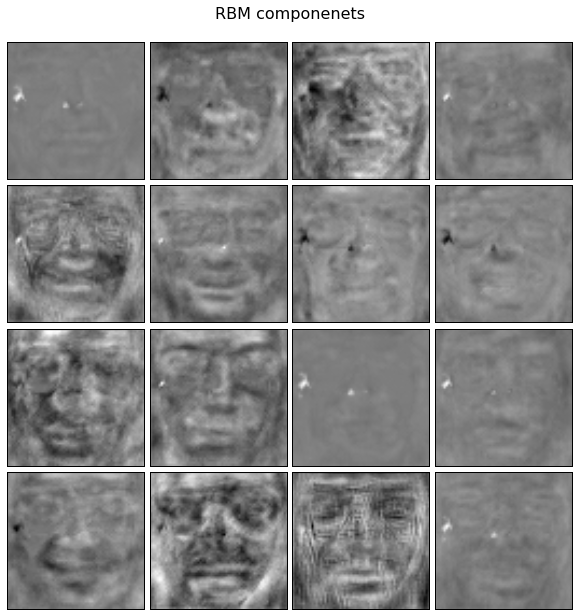

In [68]:
comp = rbm.components_
image_shape = (64, 64)
def plot_gallery(title, images, n_col, n_row):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray,            
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)
    plt.show()    
plot_gallery('RBM componenets', comp[:16], 4,4)